# Project Title- Predict Fake Advertisment Detection using Classification Algorithms


# Name:Shivani Deshmukh(Group 11)

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Data

In [2]:
df=pd.read_csv("C:\\Users\\Rahul\\Downloads\\symboisis\\project dataset\\advertising.csv")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked_on_Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,11/02/2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,22/04/2016 2:07,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,01/02/2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,24/03/2016 2:35,0


In [3]:
# view the dimensions of dataframe df
df.shape

(1000, 10)

In [4]:
# let's visualise the number of missing values
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked_on_Ad               0
dtype: int64

In [5]:
# view dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked_on_Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
#view summary statistics
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked_on_Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Exploratory Analysis

In [7]:
## Correlation
corr_matrix=df.corr()
corr_matrix

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked_on_Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked_on_Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


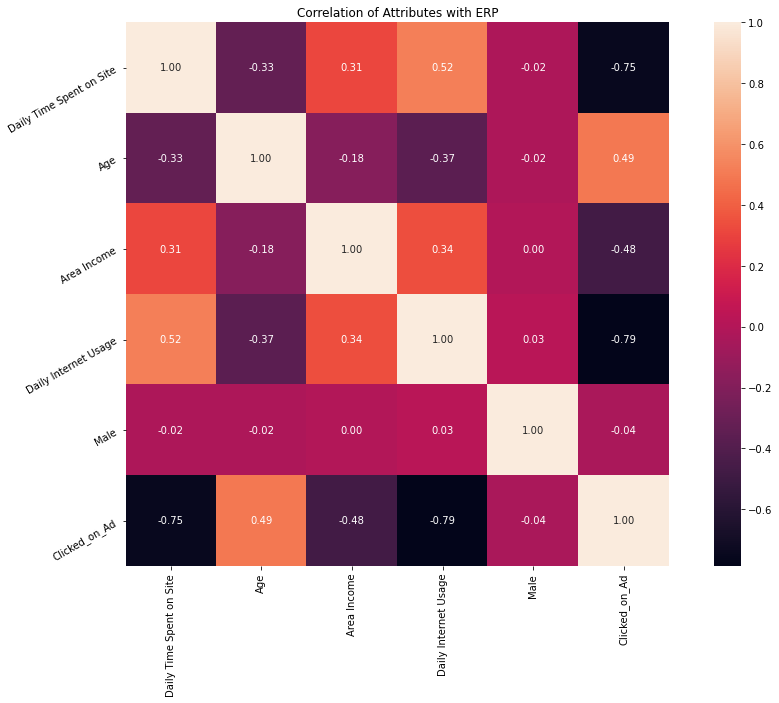

In [8]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with ERP')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

<AxesSubplot:>

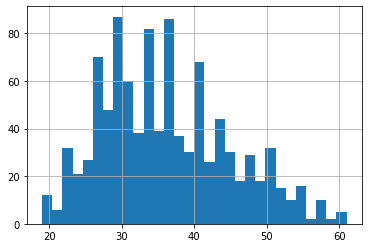

In [9]:
df['Age'].hist(bins=30)

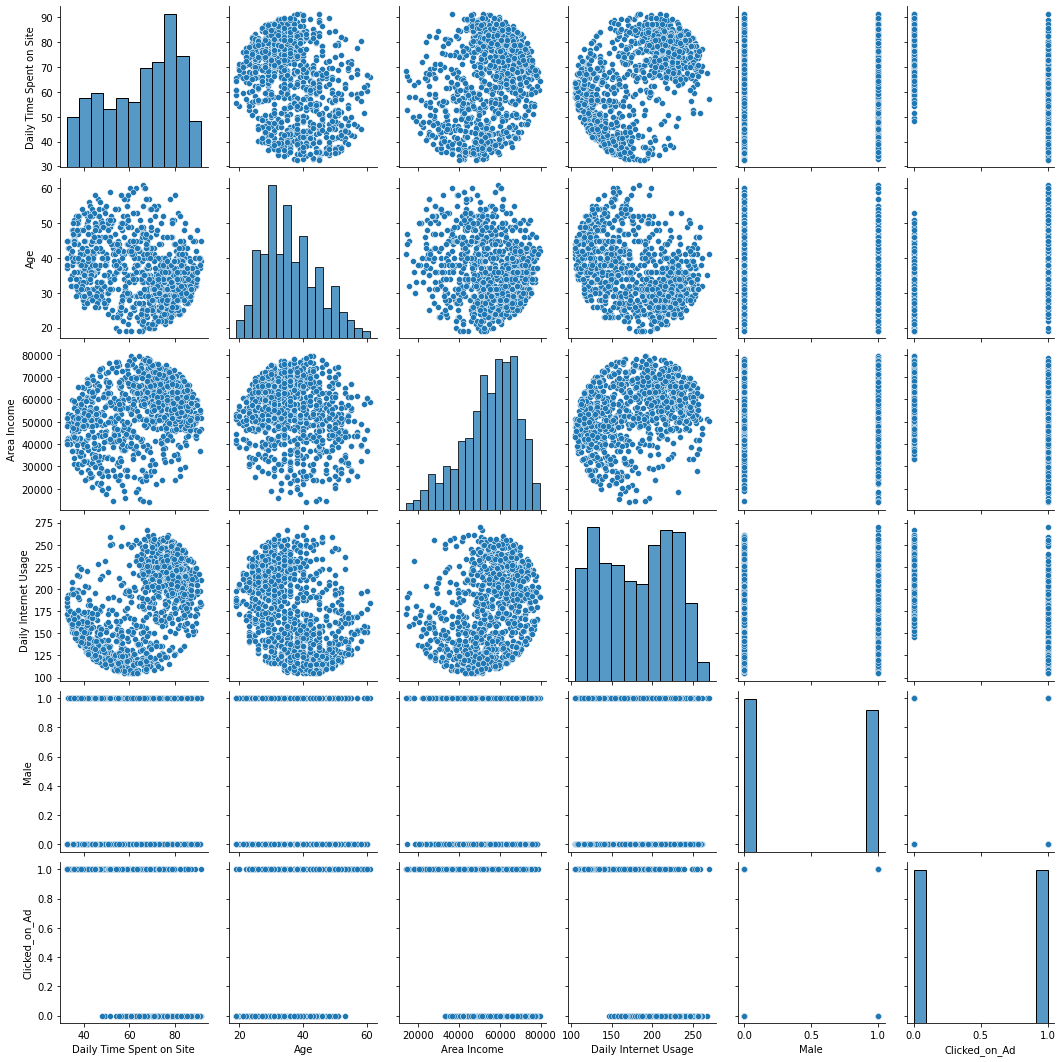

In [10]:
sns.pairplot(df)

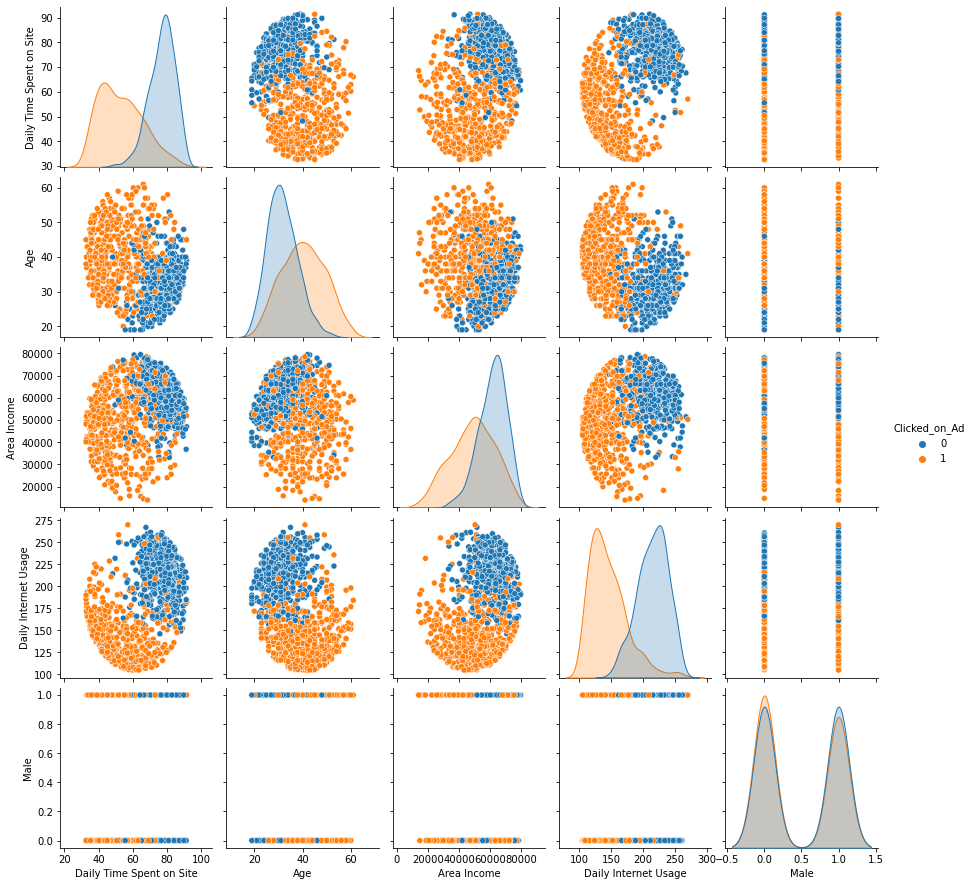

In [11]:
sns.pairplot(df,hue='Clicked_on_Ad')

<ipython-input-12-22990617b0d5>:5: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=target_count[0], xy=(-0.04,10+target_count[0]), size=14)
<ipython-input-12-22990617b0d5>:6: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=target_count[1], xy=(0.96,10+target_count[1]), size=14)


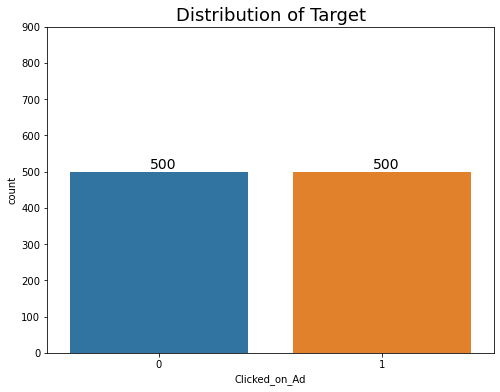

In [12]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Target', size=18)
sns.countplot(x=df['Clicked_on_Ad'])
target_count = df.Clicked_on_Ad.value_counts()
plt.annotate(s=target_count[0], xy=(-0.04,10+target_count[0]), size=14)
plt.annotate(s=target_count[1], xy=(0.96,10+target_count[1]), size=14)
plt.ylim(0,900)
plt.show()

The dataset is fairly balanced so we can start processing on data

# Splitting dataset into train and test dataset

** Spliting the data into training set and testing set using train_test_split**

In [13]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked_on_Ad'],
      dtype='object')

In [14]:
x= df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y= df['Clicked_on_Ad']

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(xtrain)
xtrain = scalar.transform(xtrain)
xtest = scalar.transform(xtest)

# Training and Evaluating Machine Learning Model

# Logistic Regression

Logistic Regression ACCURACY:  0.98
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.99      0.97      0.98        92

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



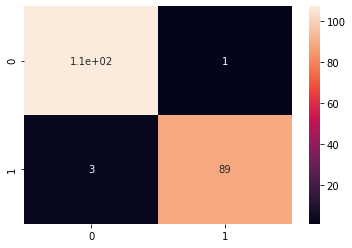

In [17]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
#fitting data to LR model
model.fit(xtrain,ytrain)
#testing on test dataset
ypred=model.predict(xtest)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc=accuracy_score(ytest,ypred)
print("Logistic Regression ACCURACY: ",acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# ROC And AUC

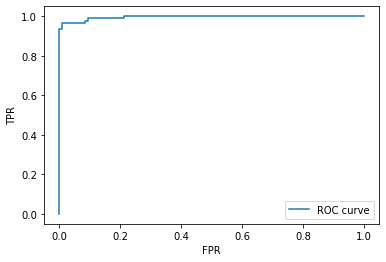

In [18]:
from sklearn import metrics
#probability of positive class
y_pred_prob=model.predict_proba(xtest)[:,1]
fpr,tpr,_=metrics.roc_curve(ytest,y_pred_prob)
auc=metrics.roc_auc_score(ytest,y_pred_prob)
plt.plot(fpr,tpr,label="ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

In [19]:
auc

0.9954710144927535

# Tuning HyperParameters of Logistic Regression

In [20]:
#estimator
model=LogisticRegression()
#parameter grid
grid=[{"penalty":["l1""l2","elasticnet","none"],
      "C":np.logspace(-4,4,20),
      "solver":["lbfgs","newton-cg","liblinear","sag","saga"],
      "max_iter":[100,1000,2500,5000]
      }
]
#grid Search cv

from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(model,param_grid=grid,cv=3,verbose=True,n_jobs=-1)
res=grid_cv.fit(xtrain,ytrain)
print(res.best_score_)
print(res.best_params_)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    6.5s


0.9687514666816854
{'C': 0.0001, 'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}


[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:   11.9s finished
C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Logistic Regression Model accuracy is : 0.975
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.98      0.97      0.97        92

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



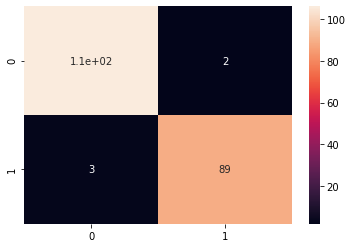

In [21]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=0.0001, max_iter= 100, penalty= 'none', solver= 'lbfgs')
#fitting data to LR model
model.fit(xtrain,ytrain)
#testing on test dataset
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
LR=accuracy_score(ytest,ypred)
print("Logistic Regression Model accuracy is :",LR)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# KNearestNeighbors

Accuracy is: 0.965
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       108
           1       1.00      0.92      0.96        92

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



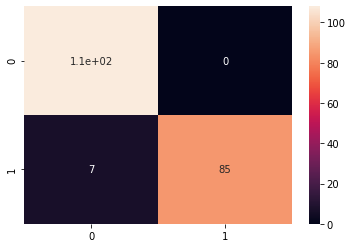

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
#fitting data to KNeighborsClassifier model
model.fit(xtrain,ytrain)
#testing on test dataset
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc=accuracy_score(ytest,ypred)
print("Accuracy is:",acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# Tuning HyperParameters of KNN

In [23]:
#estimator
model=KNeighborsClassifier()
#parameter
n_neighbors=range(1,31)
metric=["euclidean","manhattan","minkowski"]
weights=["uniform","distance"]
#parameter grid
grid={"n_neighbors":n_neighbors,"metric":metric,"weights":weights}

#cross validation
from sklearn.model_selection import RepeatedStratifiedKFold
kfold_cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=0)

#grid Search cv

from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=kfold_cv,scoring="accuracy",n_jobs=1)
res=grid_cv.fit(xtrain,ytrain)
print(res.best_score_)
print(res.best_params_)

0.9637499999999999
{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}


KNN Model accuracy is : 0.965
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       108
           1       1.00      0.92      0.96        92

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



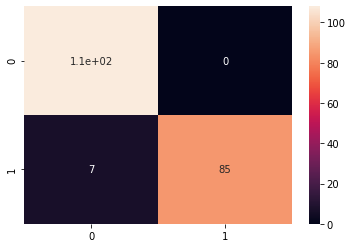

In [49]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=11,metric='euclidean',weights='distance')
#fitting data to KNN model
model.fit(xtrain,ytrain)
#testing on test dataset 
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
KNN=accuracy_score(ytest,ypred)
print("KNN Model accuracy is :",KNN)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# Naive Bayes

Naive Bayes Model Accuracy is: 0.97
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.97      0.97      0.97        92

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



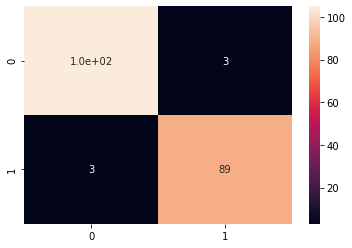

In [25]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
#fitting data to Naive Bayes model
model.fit(xtrain,ytrain)
#testing on test dataset 
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
NB=accuracy_score(ytest,ypred)
print("Naive Bayes Model Accuracy is:",NB)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# Support Vector Machine


Accuracy of model is: 0.965
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.98      0.95      0.96        92

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



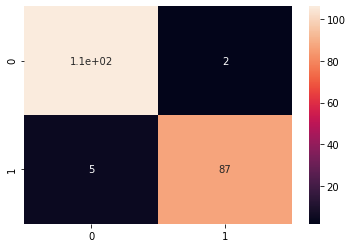

In [26]:
from sklearn.svm import SVC
model=SVC()
#fitting data to Support Vector Machine model
model.fit(xtrain,ytrain)
#testing on test dataset
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
acc=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print("Accuracy of model is:",acc)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# Decision Tree

Accuracy is: 0.925
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       108
           1       0.91      0.92      0.92        92

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.93      0.93       200



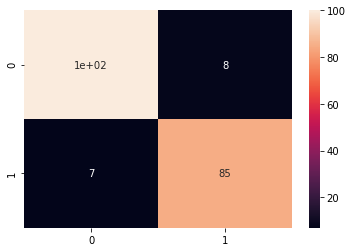

In [27]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
#fitting data to Decision Tree model
model.fit(xtrain,ytrain)
#testing on test dataset
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc=accuracy_score(ytest,ypred)
print("Accuracy is:",acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# Tuning HyperParameters of Decision Tree Classifier

In [28]:
#model DT
#parameter
criterion=["gini", "entropy"]
max_depth=list(range(1,11))
#parameter grid
grid={"criterion":criterion,"max_depth":max_depth}

#CV
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy")
res=grid_cv.fit(xtrain,ytrain)
print(res.best_score_)
print(res.best_params_)

0.9550000000000001
{'criterion': 'gini', 'max_depth': 5}


Decision Tree Classifier Model accuracy is : 0.945
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       108
           1       0.97      0.91      0.94        92

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



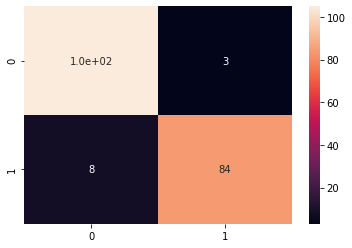

In [29]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion= 'gini',max_depth= 5)
#fitting data to DecisionTreeClassifier model
model.fit(xtrain,ytrain)
#testing on test dataset 
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
DT=accuracy_score(ytest,ypred)
print("Decision Tree Classifier Model accuracy is :",DT)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# Random Forest Classifier

Random Forest Classifier Model accuracy is : 0.965
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.97      0.96      0.96        92

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



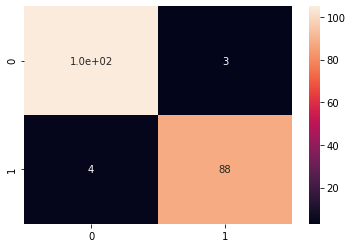

In [30]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
#fitting data to Random Forest model
model.fit(xtrain,ytrain)
#testing on test dataset 
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Random Forest Classifier Model accuracy is :",accuracy_score(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# Tuning HyperParameters of Random Forest

In [31]:
#tuning 
#parameter
max_features=["sqrt","log2"]
n_estimators=[5,10,100,1000]
grid={"max_features":max_features,"n_estimators":n_estimators}
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,cv=cv,scoring="accuracy")
res=grid_cv.fit(xtrain,ytrain)
print(res.best_params_)
print(res.best_score_)

{'max_features': 'log2', 'n_estimators': 100}
0.9608333333333333


Random Forest Model accuracy is : 0.96
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.97      0.95      0.96        92

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



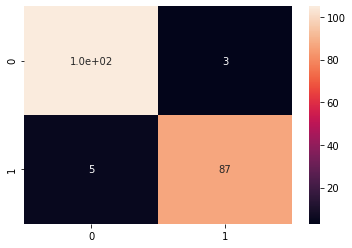

In [50]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=100,max_features='log2')
#fitting data to Random Forest model
RF.fit(xtrain,ytrain)
#testing on test dataset 
ypred=RF.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
RF=accuracy_score(ytest,ypred)
print("Random Forest Model accuracy is :",RF)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# Bagging Classifier

# Bagging Meta Estimator Classifier

Bagging Meta Estimator Classifier model Accuracy:  0.955
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       108
           1       0.98      0.92      0.95        92

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



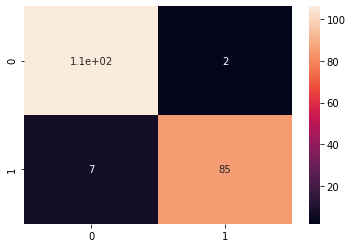

In [33]:
from sklearn.ensemble import BaggingClassifier
#making the bagging classifier with 100 decision trees
model_BMC=BaggingClassifier()
#fitting data to bagging model
model_BMC.fit(xtrain,ytrain)
#testing on test dataset 
ypred=model_BMC.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
BMEC=accuracy_score(ytest,ypred)
print("Bagging Meta Estimator Classifier model Accuracy: ",BMEC)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# BOOSTING Classifier

# Adaboost Classifier

AdaBoost Model Accuracy is: 0.95
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       108
           1       0.94      0.96      0.95        92

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



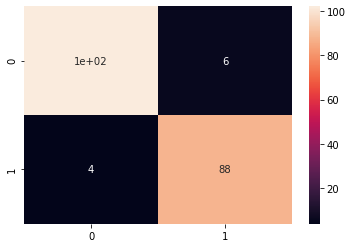

In [34]:
#Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
#fitting data to Adaboost Classifier model
model.fit(xtrain,ytrain)
#testing on test dataset
ypred=model.predict(xtest)
#Model Evaluation 
Adaboost=accuracy_score(ytest,ypred)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("AdaBoost Model Accuracy is:",Adaboost)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# Gradient Boosting Classifier

Gradient Boosting Model Accuracy is: 0.96
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.97      0.95      0.96        92

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



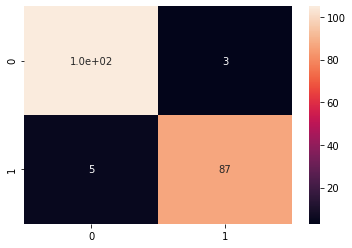

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
#fitting data to Gradientboosting Classifier model
model.fit(xtrain,ytrain)
#testing on test dataset
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
Gradientboost=accuracy_score(ytest,ypred)
print("Gradient Boosting Model Accuracy is:",Gradientboost)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

# XGBoostClassifier

C:\Users\Rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:36:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Model Accuracy is: 0.95
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       108
           1       0.94      0.96      0.95        92

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



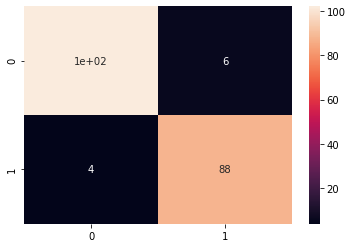

In [36]:
from xgboost import XGBClassifier
model=XGBClassifier()
#fitting data to XGboosting Classifier model
model.fit(xtrain,ytrain)
#testing on test dataset
ypred=model.predict(xtest)
#Model Evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
XGboost=accuracy_score(ytest,ypred)
print("XGBoost Model Accuracy is:",XGboost)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

In [51]:
models = [('Logistic Regression', LR.mean()),
    ('KNearest Neighbors', KNN.mean()),
    ('Naive Bayes Accuracy', NB.mean()),
    ('Decision Tree Classifier Accuracy', DT.mean()),
    ('Bagging Meta Estimator Classifier Accuracy', BMEC.mean()),
    ('Random Forest Classifier Accuracy', RF.mean()),
    ('AdaBoosting Classifier Accuracy', Adaboost.mean()),
    ('Gradient Boosting Classifier Accuracy', Gradientboost.mean()),
    ('XGBoosting Classifier Accuracy', XGboost.mean())]

In [52]:
predict = pd.DataFrame(data = models, columns=['Model', 'Accuracy'])
predict

,Model,Accuracy
0,Logistic Regression,0.975
1,KNearest Neighbors,0.965
2,Naive Bayes Accuracy,0.970
3,Decision Tree Classifier Accuracy,0.945
4,Bagging Meta Estimator Classifier Accuracy,0.955
5,Random Forest Classifier Accuracy,0.960
6,AdaBoosting Classifier Accuracy,0.950
7,Gradient Boosting Classifier Accuracy,0.960
8,XGBoosting Classifier Accuracy,0.950


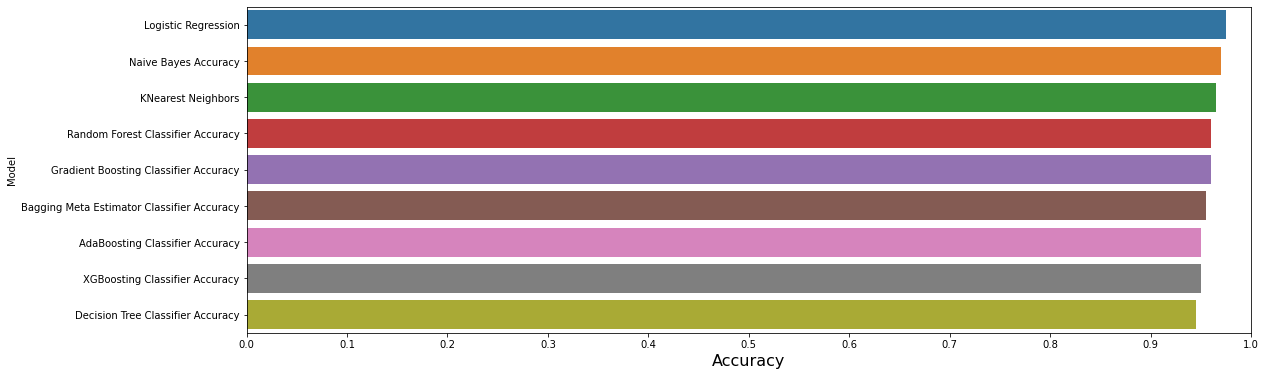

In [39]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Accuracy', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Accuracy', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

# Predicting for new data

In [44]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C=0.0001, max_iter= 100, penalty= 'none', solver= 'lbfgs')
clf.fit(xtrain, ytrain.values.ravel())

C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


LogisticRegression(C=0.0001, penalty='none')

In [41]:
from sklearn.metrics import confusion_matrix
y_pred = np.array(clf.predict(xtest))
conf_mat = pd.DataFrame(confusion_matrix(ytest, y_pred),
                        columns=["Pred.Negative", "Pred.Positive"],
                        index=['Act.Negative', "Act.Positive"])
tn, fp, fn, tp = confusion_matrix(ytest, y_pred).ravel()
accuracy = round((tn+tp)/(tn+fp+fn+tp), 4)
print(conf_mat)
print(f'\n Accuracy = {round(100*accuracy, 2)}%')

              Pred.Negative  Pred.Positive
Act.Negative            105              3
Act.Positive              4             88

 Accuracy = 96.5%


In [42]:
from sklearn.preprocessing import StandardScaler
ad_template = np.array([68.95, 35, 61833.90, 256.90,0], ndmin=2)
ad_template= scalar.transform(ad_template)
print(f'Prediction:(Class 0 =Real Advertisement & Class 1 =Fake Advertisement) Result Class=  {clf.predict(ad_template)[0]}')

Prediction:(Class 0 =Real Advertisement & Class 1 =Fake Advertisement) Result Class=  0


# Our Model Predicts That advrtisement template is Real


In [46]:
from sklearn.preprocessing import StandardScaler
ad_template = np.array([47.64,49,45632.51,122.02,0], ndmin=2)
ad_template= scalar.transform(ad_template)
print(f'Prediction:(Class 0 =Real Advertisement & Class 1 =Fake Advertisement) Result Class=  {clf.predict(ad_template)[0]}')

Prediction:(Class 0 =Real Advertisement & Class 1 =Fake Advertisement) Result Class=  1


# Our Model Predicts That advrtisement template is Fake

# Conclusion

In [ ]:
In this kernel, I have built 10 Classification models using Fake_Currency_Detection Dataset. These are Logistic Regression, KNearest Neighbor, Naive Bayes, Support Vector Classifie, Decision Tree, Bagging Meta Estimator, Random Forest, AdaBoosting, XGBoost,GradientBoost. Then measured and visualized the performance of the models.we can see the Logistic model accuracy is 97.5%. By using this model,we predict result as this advertisement is Fake or Real...